In [33]:
import os
import json

# Check if file exists and is not empty
if os.path.exists('coronary_template.json') and os.path.getsize('coronary_template.json') > 0:
    from coronary_template import CoronaryTemplate
    ct = CoronaryTemplate('coronary_template.json')
    
    # Test with 3.5mm parent and 1.8mm/1.6mm children
    result = ct.validate_finet_law(3.5, 1.8, 1.6)
    print(f"LAD Validation: {'PASS' if result['valid'] else 'FAIL'}")
    print(f"Error: {result['error']}mm (Tolerance: 0.5mm)")
else:
    print("Error: coronary_template.json is missing or empty.")

LAD Validation: FAIL
Error: 2.1031750288600937mm (Tolerance: 0.5mm)


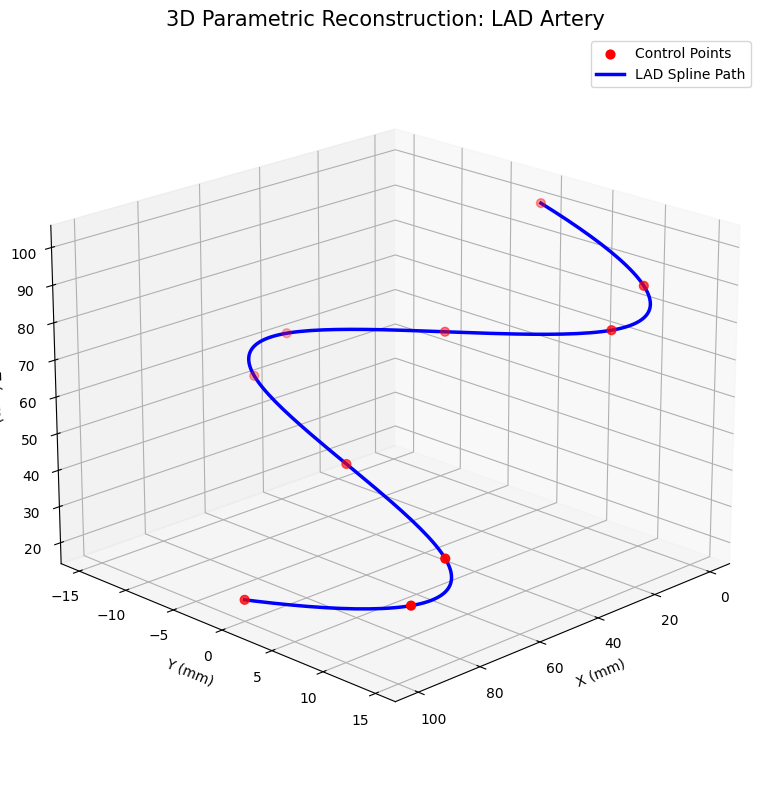

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
from bspline_utils import CoronaryCurve

# 1. Load the anatomical data
with open('coronary_template.json', 'r') as f:
    template_data = json.load(f)

lad_data = template_data['vessels']['LAD']
lad_points = np.array(lad_data['control_points'])

# 2. Fit the B-spline
curve = CoronaryCurve(lad_points)

# 3. Generate smooth path for plotting
t_samples = np.linspace(0, 1, 200)
curve_points = curve.spline(t_samples)

# 4. Create the 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original control points
ax.scatter(lad_points[:, 0], lad_points[:, 1], lad_points[:, 2], 
           color='red', label='Control Points', s=40)

# Plot the interpolated B-spline path
ax.plot(curve_points[:, 0], curve_points[:, 1], curve_points[:, 2], 
        color='blue', label='LAD Spline Path', linewidth=2.5)

# Plot the D1 Bifurcation point using arc-length mapping
for bif in lad_data.get('bifurcations', []):
    dist = bif['distance_mm']
    point = curve.point_at_arc_length(dist)
    ax.scatter(point[0], point[1], point[2], color='green', marker='X', s=100, 
               label=f'Bifurcation {bif["name"]} (@{dist}mm)')

# Plot Styling
ax.set_title('3D Parametric Reconstruction: LAD Artery', fontsize=15)
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.legend()
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

In [11]:
!python3 main_hk.py

Coronary Tree Analysis

Vessel: LAD
  Total Arc-Length: 0.23 mm
  Midpoint Curvature: 0.0375

Vessel: LCX
  Total Arc-Length: 0.16 mm
  Midpoint Curvature: 0.0075

Vessel: RCA
  Total Arc-Length: 0.20 mm
  Midpoint Curvature: 0.0042

--- Bifurcation Validation (Finet's Law) ---
  Measured: 3.5mm
  Expected: 3.07mm
  Valid: No (Tolerance < 0.3mm)


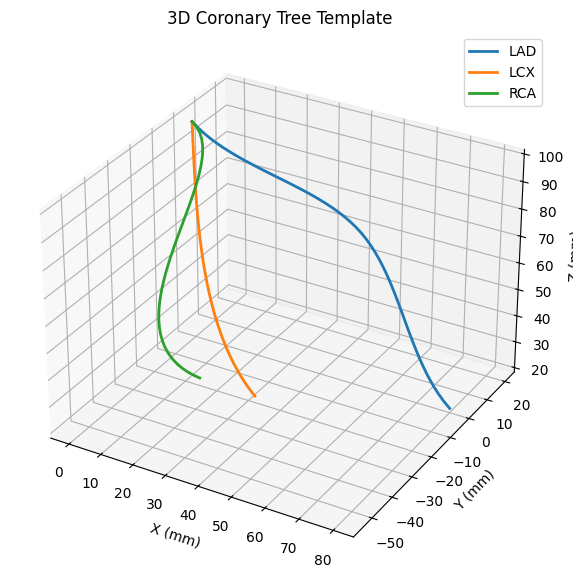

In [12]:
import matplotlib.pyplot as plt
from coronary_template import CoronaryTemplate

template = CoronaryTemplate('coronary_template_hk.json')
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for name, curve in template.vessels.items():
    points = curve.sample_by_arc_length(100)
    ax.plot(points[:, 0], points[:, 1], points[:, 2], label=name, linewidth=2)

ax.set_title("3D Coronary Tree Template")
ax.set_xlabel("X (mm)"), ax.set_ylabel("Y (mm)"), ax.set_zlabel("Z (mm)")
ax.legend()
plt.show()

In [15]:
!python3 main.py

Coronary Tree Analysis

Vessel: LAD
  Total Arc-Length: 0.23 mm
  Midpoint Curvature: 0.0375

Vessel: LCX
  Total Arc-Length: 0.16 mm
  Midpoint Curvature: 0.0075

Vessel: RCA
  Total Arc-Length: 0.20 mm
  Midpoint Curvature: 0.0042

 Bifurcation Validation (Finet's Law)
  Measured: 3.5mm
  Expected: 3.59mm
  Valid: Yes (Tolerance < 0.3mm)


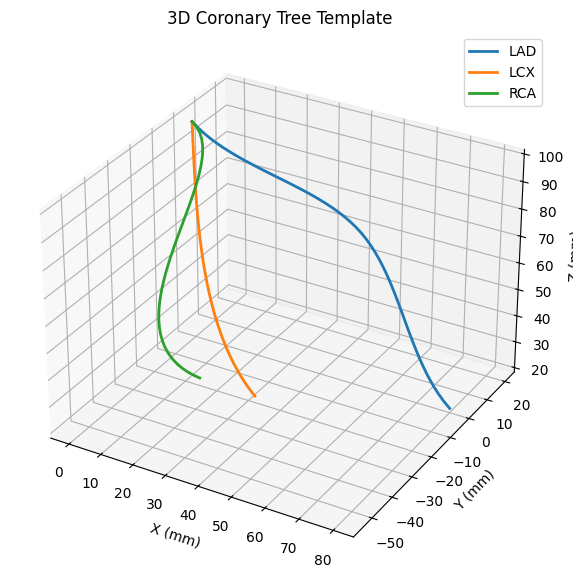

In [16]:
import matplotlib.pyplot as plt
from coronary_template import CoronaryTemplate

template = CoronaryTemplate('coronary_template.json')
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for name, curve in template.vessels.items():
    points = curve.sample_by_arc_length(100)
    ax.plot(points[:, 0], points[:, 1], points[:, 2], label=name, linewidth=2)

ax.set_title("3D Coronary Tree Template")
ax.set_xlabel("X (mm)"), ax.set_ylabel("Y (mm)"), ax.set_zlabel("Z (mm)")
ax.legend()
plt.show()